In [379]:
# Core imports for data handling, encoding, visualization, and splitting
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
# 📥 Load the dataset from a CSV file
data = pd.read_csv("loan_data.csv")

In [381]:
display(data)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [382]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [383]:
print(data["person_education"].unique())

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [384]:
print(data.select_dtypes(exclude = ['number']).columns)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


In [385]:
print(data.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [386]:
#  One-hot encode specified categorical columns; convert them to numeric dummy variables (0/1).

data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent','person_gender'], dtype=int)

In [387]:
data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].map({'Yes' : 1, "No" : 0})
display(data)

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_gender_female,person_gender_male
0,22.0,Master,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,1,0,0,0,0,1,0,1,0
1,21.0,High School,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,1,0,0,1,0,0,0,0,1,0
2,25.0,High School,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,0,0,0,0,0,1,0,0,1,0
3,23.0,Bachelor,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,Master,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Associate,47971.0,6,15000.0,15.66,0.31,3.0,645,0,...,0,1,0,0,0,1,0,0,0,1
44996,37.0,Associate,65800.0,17,9000.0,14.07,0.14,11.0,621,0,...,0,1,0,0,1,0,0,0,1,0
44997,33.0,Associate,56942.0,7,2771.0,10.02,0.05,10.0,668,0,...,0,1,1,0,0,0,0,0,0,1
44998,29.0,Bachelor,33164.0,4,12000.0,13.23,0.36,6.0,604,0,...,0,1,0,1,0,0,0,0,0,1


In [388]:
print(data["person_education"].unique())

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [389]:
# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'person_education' column
data['person_education_encoded'] = le.fit_transform(data['person_education'])

data = data.drop('person_education', axis=1)

In [390]:
# Apply log transform to reduce skewness in 'person_income' and create a new feature.
data["person_income_log"] = np.log1p(data["person_income"])

# Import and initialize StandardScaler to standardize features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale person_income_log
data["person_income_scaled"] = scaler.fit_transform(data[['person_income_log']])

# Drop original column
data = data.drop("person_income", axis = 1)

In [391]:
# Log-transform 'loan_amnt' to reduce skewness; saves as a new feature.
data["loan_amnt_log"] = np.log1p(data["loan_amnt"])

# Scale 'loan_amnt_log' to standardize its values.
data["loan_amnt_scaled"] = scaler.fit_transform(data[['loan_amnt_log']])

# Drop original 'loan_amnt' column to avoid duplicate info.
data = data.drop("loan_amnt", axis = 1)

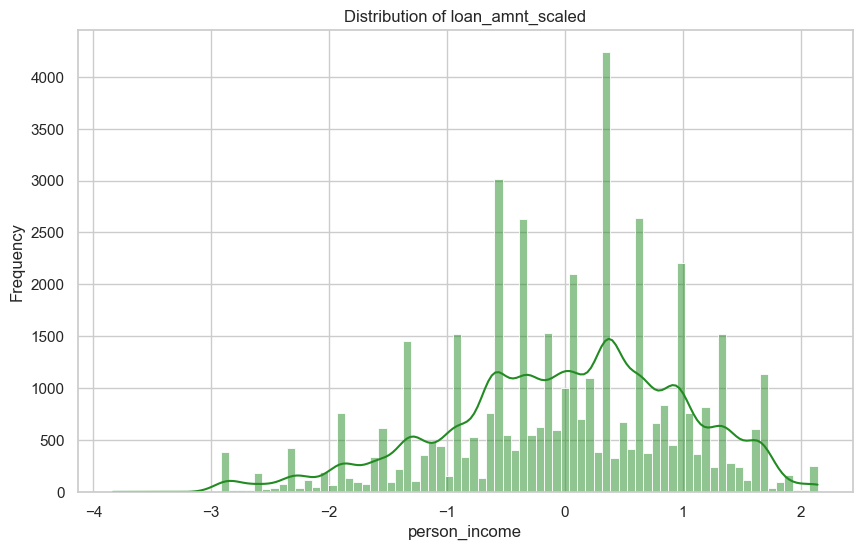

In [392]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt_scaled'], color='forestgreen', kde=True)
plt.title('Distribution of loan_amnt_scaled')
plt.xlabel('person_income')
plt.ylabel('Frequency')
plt.show()

In [393]:
# Standardize 'credit_score'; drop original to keep only scaled version.
data["credit_score_scaled"] = scaler.fit_transform(data[['credit_score']])
data = data.drop("credit_score", axis = 1)

print(data["credit_score_scaled"])

0       -1.419814
1       -2.549975
2        0.047412
3        0.840507
4       -0.924130
           ...   
44995    0.245686
44996   -0.230171
44997    0.701716
44998   -0.567237
44999   -0.091380
Name: credit_score_scaled, Length: 45000, dtype: float64


In [394]:
# Log-transform 'person_age' to reduce skewness; saves as a new feature.
data["person_age_log"] = np.log1p(data["person_age"])

# Scale 'person_age_log' to standardize its values.
data["person_agescaled"] = scaler.fit_transform(data[['person_age_log']])

# Drop original 'person_age' column to avoid duplicate info.
data = data.drop("person_age", axis = 1)

In [395]:
X = data.drop("loan_status", axis = 1)
y = data["loan_status"]

In [396]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [397]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Zarqash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [399]:
y_pred = model.predict(X_test)

In [400]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8923333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.76      0.75      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [401]:
print("Feature Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Feature Coefficients: [[-1.23681021e-02  3.24999680e-01  3.68146808e+00  7.79465962e-03
  -1.17391451e+01  2.92710445e-01  4.37913921e-01 -1.59010248e+00
   8.45210577e-01  5.18626886e-01 -2.82605698e-01  3.64790640e-01
   1.94718019e-01 -1.77152388e-01 -6.32644996e-01 -3.46264262e-02
   2.03588901e-02  4.32284352e-03 -5.88374155e-01 -7.70738053e-01
   1.51765972e-01  3.93018396e-01 -4.60656815e-01 -3.17428156e-02
   8.67550991e-02]]
Intercept: [-0.01533302]


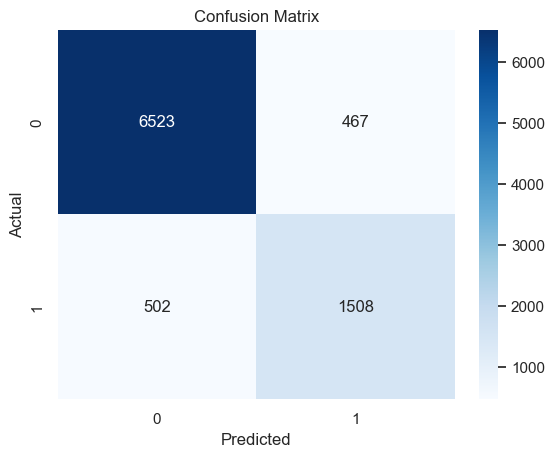

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()